In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.5 in c:\python39\lib\site-packages (from python-dateutil>=2.7.3->pandas>=1.0->sidetable) (1.15.0)


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install plotly

     ---------------------------------------- 15.2/15.2 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
warnings.filterwarnings('ignore')


### Double Checking The Data

In [4]:
df = pd.read_csv('hotel_cleaned.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


In [5]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
arrival_month               

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   meal                            118985 non-null  object 
 9   country                         118985 non-null  object 
 10  market_segment                  118985 non-null  object 
 11  distribution_channel            118985 non-null  object 
 12  is_repeated_gues

### Descriptive Analysis

In [7]:
df.describe()

# as we know from the cleaning process before that our data has a lot of outliers in it  we will try to bin them and not dropping them 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,1.862689,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,6.552381,3.425961,1.971072,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.570064,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,3.089348,2.541649,0.719446,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


In [8]:
df.describe(include = 'O')


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_date,arrival_day,month_year
count,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985,118985
unique,2,12,4,177,8,5,9,11,3,4,3,926,793,7,26
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,2015-12-05,Friday,2017-05
freq,78939,13829,92018,48917,56221,97559,85861,73982,104237,89336,74871,1460,448,19556,6297


## Univariate Analysis

#### Hotel Type

In [9]:
df.stb.freq(['hotel'], cum_cols=False)

# as we mentioned before that there are more booking from the city hotel compared to the resort hotel in this case 
# we will se it later on how this affect cancellation 

,hotel,count,percent
0,City Hotel,78939,66.343657
1,Resort Hotel,40046,33.656343


#### Cancellation 



In [10]:
df.stb.freq(['is_canceled'], cum_cols = False)

# this cancellation rate is somehow similar to the industry standard around 37 % - 40 % in 
# source :
# https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/

# this is the problem that hospitality industy is facing there are almost 4 cancellation in every 10 bookings 

# this data is  almost balance, so later on for the machine learning process we wont need to do an imbalance handling 

,is_canceled,count,percent
0,0,74871,62.924738
1,1,44114,37.075262


#### Lead Time 


Since the're are many unique values in the lead time we will group it into months before we do analysis on those so hopefully we can see a trend from binning lead time into months

In [11]:
lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

## we can see that here majority of the booking were made during the same month as the planned arrival 
#however there are some booking that's made a year or more ahead before the arrival 
# and we will see how this longer period of lead time affecting cancellation rate 

In [12]:
df.stb.freq(['lead_time_month'], cum_cols = False)

,lead_time_month,count,percent
0,0,37879,31.835105
1,1,17140,14.405177
2,2,12697,10.671093
3,3,10453,8.785141
4,4,8046,6.762197
5,5,7891,6.631928
6,6,5699,4.789679
7,7,4354,3.659285
8,9,3441,2.891961
9,8,3420,2.874312


#### Distribution Channel



In [13]:
df.stb.freq(['distribution_channel'], cum_cols= False)

# as we can see from the table below that Travel Agent or Tour Operator is the biggest booking distribution channel 
# compared to other channel while direct is the second most biggest distribution channel

# we will treat the undefined values as TA / TO 

,distribution_channel,count,percent
0,TA/TO,97559,81.992688
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205
4,Undefined,5,0.004202


In [14]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

In [15]:
df.stb.freq(['distribution_channel'], cum_cols= False)


,distribution_channel,count,percent
0,TA/TO,97564,81.996890
1,Direct,14577,12.251124
2,Corporate,6651,5.589780
3,GDS,193,0.162205


#### Market Segment

In [16]:
df.stb.freq(['market_segment'], cum_cols = False)

# the market segment is almost similar to the distribution channel 
# however we see that there are more categories in this column compared to the distribution channel 
# we see from here that travel agent (online and offline) market segment dominating the booking compared to other market segment

# there are aa couple of undefined values as well we will replace it with mode here in this case is 'Online TA'
# this is because of imputing the random value with the most frequent value in the column

,market_segment,count,percent
0,Online TA,56221,47.250494
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504
7,Undefined,2,0.001681


In [17]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')
df.stb.freq(['market_segment'], cum_cols = False)

# how we have replace the undefined value in the column

,market_segment,count,percent
0,Online TA,56223,47.252175
1,Offline TA/TO,24178,20.320208
2,Groups,19790,16.632349
3,Direct,12553,10.550069
4,Corporate,5282,4.439215
5,Complementary,724,0.608480
6,Aviation,235,0.197504


#### Meal Type

In [18]:
df.stb.freq(['meal'], cum_cols=False)

# bed and breakfast is the most popular meal package compared to the rest of the meal package 
# while full board is the least popular meal package compared to the rest of the meal package (included breakfast, lunch , dinner )


,meal,count,percent
0,BB,92018,77.335799
1,HB,14454,12.147750
2,SC,11715,9.845779
3,FB,798,0.670673


#### Country

In [19]:
df.stb.freq(['country'], cum_cols = False).head(10)

# almost half of the booking is made from portugal (this is kind of make sense since the both of the hotel is in portugal)

# since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent
# or we will group it into booking from portugal and booking from outside portugal since both of the hotel are in portugal
# it's kind of make sense to split the booking into international booking or local booking 

,country,count,percent
0,PRT,48917,41.111905
1,GBR,12104,10.172711
2,FRA,10376,8.720427
3,ESP,8546,7.182418
4,DEU,7271,6.110854
5,ITA,3752,3.153339
6,IRL,3370,2.832290
7,BEL,2326,1.954868
8,BRA,2212,1.859058
9,NLD,2094,1.759886


In [20]:
def country(row):
    if (row['country'] == 'PRT'):
        return 'Local'
    else :
        return 'International'
    
df['booking_location'] = df.apply(country, axis = 1)

df.stb.freq(['booking_location'], cum_cols=False)

# the goals of creating a new column here so later on we can see how booking location affecting cancellation

,booking_location,count,percent
0,International,70068,58.888095
1,Local,48917,41.111905


#### Reserved Room Type


In [21]:
df.stb.freq(['reserved_room_type'], cum_cols = False)

# as from our df.describe(include = 'O') we saw that room A is the most popular room in the bookings 
# we will figure out later why, our assumption for now is room A is the cheapest room in the booking 
# compared to any other rooms

,reserved_room_type,count,percent
0,A,85861,72.161197
1,D,19178,16.117998
2,E,6518,5.478001
3,F,2892,2.430558
4,G,2091,1.757364
5,C,931,0.782452
6,B,907,0.762281
7,H,601,0.505106
8,L,6,0.005043


#### Deposit Type

In [22]:
df.stb.freq(['deposit_type'], cum_cols = False)

# as we mentioned before that the No deposit type is the most popular compared to other deposit type in this booking in portugal 
# this might be the reason why the cancellation in the industry has been on a rise
# the flexibility that's given to the customer to book hotel without any deposit

,deposit_type,count,percent
0,No Deposit,104237,87.605160
1,Non Refund,14586,12.258688
2,Refundable,162,0.136152


#### Repeated Guest

In [23]:
df.stb.freq(['is_repeated_guest'], cum_cols = False)

# from this table below we see that there are only 3.1 % of repeated guest from this booking 
# this might be affecting the cancellation of the hotel from the low rate of loyal customers 
# we will deep dive into this later on 

# since we will not solely looking into loyal customer but this is few reason why loyal customer are more profitable than
# the old ones 
# 1. They already know your value.
# 2. They cost less to service.
# 3. They refer more business.
# 4. They will buy and pay more

# source : http://www.converoinc.com/4-reasons-existing-customers-are-more-profitable-than-new-ones/

,is_repeated_guest,count,percent
0,0,115232,96.845821
1,1,3753,3.154179


### previous Cancellation

In [24]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

# almost 95% of the booking never been cancelled before in this data set
# we will group this into booking that's never been cancelled or have been cancelled before 

,previous_cancellations,count,percent
0,0,112508,94.556457
1,1,6046,5.081313
2,2,114,0.095810
3,3,65,0.054629
4,24,48,0.040341
5,11,35,0.029415
6,4,31,0.026054
7,26,26,0.021851
8,25,25,0.021011
9,6,22,0.018490


In [25]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,112508,94.556457
1,1,6477,5.443543


#### Booking Changes

In [26]:
df.stb.freq(['booking_changes'], cum_cols = False)

# almost 85 % of the customers never change their booking 
# since there are many values of this booking changes column 
# we will group it in to does the booking ever been changes or not 

,booking_changes,count,percent
0,0,101066,84.940119
1,1,12620,10.606379
2,2,3773,3.170988
3,3,910,0.764802
4,4,367,0.308442
5,5,114,0.095810
6,6,61,0.051267
7,7,28,0.023532
8,8,14,0.011766
9,9,8,0.006724


In [27]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,101066,84.940119
1,1,17919,15.059881


#### Special Request

In [28]:
df.stb.freq(['total_of_special_requests'], cum_cols = False)

# more than half of the customers don't have any special request when they book
# we will see later if special request has an effect on the cancellation

,total_of_special_requests,count,percent
0,0,70131,58.941043
1,1,33085,27.806026
2,2,12911,10.850948
3,3,2480,2.084296
4,4,338,0.284069
5,5,40,0.033618


#### Customer Type

In [29]:
df.stb.freq(['customer_type'], cum_cols = False)


# majority of the booking  customer here are transient (individual booking /personal not related to company or anything )
# we will see how this customer type affecting the cancellation rate as well 

,customer_type,count,percent
0,Transient,89336,75.081733
1,Transient-Party,25005,21.015254
2,Contract,4071,3.421440
3,Group,573,0.481573


### Arrival Date Month

In [30]:
df.stb.freq(['arrival_date_month'], cum_cols = False)


# 3 times of july and August
#  while the rest of the month year only appear twice 
# since this data is from July 2015 - August 2017

# using the percentage here wouldn't be so reliable since there are months that appear more than some months 


,arrival_date_month,count,percent
0,August,13829,11.622473
1,July,12611,10.598815
2,May,11764,9.886961
3,October,11131,9.354961
4,April,11057,9.292768
5,June,10917,9.175106
6,September,10489,8.815397
7,March,9749,8.193470
8,February,8034,6.752112
9,November,6765,5.685591


#### Arrival Day 

In [31]:
df.stb.freq(['arrival_day'], cum_cols = False)

# we see from here that booking for arrivalf day on Friday and Thursday has the higest percentage among all the other day 
# while Booking for the arrival day of Sunday and Tuesday has the lowest percentage 
# we will try to see this  with the number of cancellation 

,arrival_day,count,percent
0,Friday,19556,16.435685
1,Thursday,19187,16.125562
2,Monday,18127,15.234693
3,Saturday,18002,15.129638
4,Wednesday,16074,13.509266
5,Sunday,14090,11.841829
6,Tuesday,13949,11.723326


## Multivariate Analysis


since our goals is to findout what leads into high cancellation by looking at the characteristic of the customer and the pattern of cancelled booking, our multivariate analysis will centered around that process 

In [32]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [33]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0


#### Hotel Type and Cancellation 

In [34]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

df.stb.freq(['hotel'], cum_cols = False)

display_side_by_side([pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index'), df.stb.freq(['hotel'], cum_cols = False)],['Cancelation', 'Number of Bookings'])


# we see that city hotels booking are more likely to be cancelled compared to the resort hotel in this booking dataset 
# we will make an assumption here with the increase numbers of booking the increase the number of booking cancellation 
# (postively correlated)



#### Lead time and cancellation

how does lead time affect cancellation does a longer lead time will result in higher chances of cancellation, for this analysis we have group the lead time into month ( assuming 1 month is 30 days) 

In [35]:
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

# from the crosstab below we see that leadtime in general has a linear effect towards cancellation 
# it means in general that the longer lead time has a higher cancellation rate compared to the shorter one 

# bookings that has more than 7 months lead time are more likely to be canceled compared to confirmed 

is_canceled,0,1
lead_time_month,,
0,0.817498,0.182502
1,0.636173,0.363827
2,0.602189,0.397811
3,0.558978,0.441022
4,0.563510,0.436490
5,0.538081,0.461919
6,0.551851,0.448149
7,0.531465,0.468535
8,0.448830,0.551170


#### Arrival Date year and Cancellation

In [36]:
pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')

# the cancellation rate goes down about 1.2 % from in 2016
# however the cancellation rate goes up 1.9 % in 2017 to 38. 7 % 

# that cancellation rate are almost similar to industry standard reported in 2018 reported there are 40 % of cancellation of bookings
# source :
# https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/

# however both the 2015 and 2017 only have the half of the year so this result may not represent the actual
# cancelation for both 2015 and 2017

is_canceled,0,1
arrival_date_year,,
2015,0.629373,0.370627
2016,0.641004,0.358996
2017,0.612807,0.387193


#### Arrival Date Month and Cancellation 

in this crosstab we want to see is there any specific month that has higher cancellation compared to the rest of the month or month doesn't have any effect on cancellation

In [37]:
pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# there's definitely fluctuation in term of arrival month and cancellation 
# with the highest cancellation month are in 
# 1. June (41.5 %)
# 2. April (40.8 %)
# 3. May (39. 6 %)

# those months are summer months 
# according to :
# https://www.timeanddate.com/holidays/portugal/2017

# those 3 months combined to total of 18 days of holidays and observance in 2017
# 15 days in 2016 
# 14 days in 2015 

# plus june is a school holiday in portugal

# source : https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.

# that's might be the reason why on those month cancelation is higher compared to the other months 

is_canceled,0,1
arrival_date_month,,
June,0.584959,0.415041
April,0.592114,0.407886
May,0.603111,0.396889
September,0.608352,0.391648
October,0.618722,0.381278
August,0.622098,0.377902
July,0.625169,0.374831
December,0.649792,0.350208
February,0.665546,0.334454


#### Number of Adults, kids, Total & guest Cancellation 

is there any effect on the numbers of adult in the booking towards cancellation

In [38]:
pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# we can see below it shows that booking that has more than 4 adults registered in a single booking is always been canceled

is_canceled,0,1
adults,,
5,0.000000,1.000000
6,0.000000,1.000000
10,0.000000,1.000000
20,0.000000,1.000000
26,0.000000,1.000000
27,0.000000,1.000000
40,0.000000,1.000000
50,0.000000,1.000000
55,0.000000,1.000000


In [39]:
pd.crosstab(df['kids'], df['is_canceled'], normalize = 'index')

# it seems that the number of kids in the booking doesn't really have any correlation towards cancellation

is_canceled,0,1
kids,,
0.0,0.627407,0.372593
1.0,0.691841,0.308159
2.0,0.587609,0.412391
3.0,0.731959,0.268041
9.0,1.000000,0.000000
10.0,0.500000,0.500000


In [40]:
pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

# for guests columns it it's almost similar like the adults columns however there are confirmed booking 
# 

is_canceled,0,1
guests,,
1.0,0.709660,0.290340
2.0,0.603013,0.396987
3.0,0.678180,0.321820
4.0,0.581064,0.418936
5.0,0.751825,0.248175
6.0,0.000000,1.000000
10.0,0.500000,0.500000
12.0,0.500000,0.500000
20.0,0.000000,1.000000


 #### Booking Meal Package and Cancellation 
 
 
is booking meal package affecting the cancellation rate ? 

In [41]:
pd.crosstab(df['meal'], df['is_canceled'], normalize = 'index')

# out of all meal package, booking that's with full board meal (breakfast, lunch, dinner are more likely to cancel compared to )
# booking with other meal package

# while the other meal package has cancellation around 34 - 37 % 

is_canceled,0,1
meal,,
BB,0.625932,0.374068
FB,0.401003,0.598997
HB,0.655251,0.344749
SC,0.638754,0.361246


#### Booking Location and Cancellation


since both of this hotel are in portugal we want to see whether a local booking ( booking made within portugal) or international booking that has a higher rate of cancellation 

In [42]:
pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')


# it's suprising that booking that's made in portugal are almost 2.5 X more likely to be cancelled compared to booking
# that's made outside portugal 
# we will do deeper analysis why booking in portugal are more likely to be canceled compared to the international booking 

is_canceled,0,1
booking_location,,
International,0.763601,0.236399
Local,0.436801,0.563199


#### Which Market Segment & Distribution Channel Are More Likely to Cancel

which market segment & Distribution Channe; that has the highest cancellation rate compared to it's confirmed rate?


In [43]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

# we see here that group market segment has a higher cancel rate compared to it's confirmed rate 
# next to it iss travel agent (online) and offline has almost a similar number in term of cancellation rate
# the lowest cancellation rate is direct booking (we exclude complimentary since it's complimentary)

is_canceled,0,1
market_segment,,
Aviation,0.778723,0.221277
Complementary,0.878453,0.121547
Corporate,0.812382,0.187618
Direct,0.846491,0.153509
Groups,0.388883,0.611117
Offline TA/TO,0.656713,0.343287
Online TA,0.632499,0.367501


In [44]:
pd.crosstab(df['distribution_channel'], df['is_canceled'], normalize = 'index')

# Travel Agent / Tour Operators has the highest cancellation rate among all the distribution channel 
# while direct has the lowest cancellation rate 

is_canceled,0,1
distribution_channel,,
Corporate,0.779432,0.220568
Direct,0.825273,0.174727
GDS,0.808290,0.191710
TA/TO,0.589367,0.410633


#### Booking Changes & Cancellation


Does Changes in booking affecting a booking will be cancelled or not 


In [45]:
pd.crosstab(df['is_booking_changes'], df['is_canceled'], normalize = 'index')

# booking that has changes are less likely to be cancelled compared to the booking that's never been changed(original booking)

is_canceled,0,1
is_booking_changes,,
0,0.591376,0.408624
1,0.842848,0.157152


#### Previosly Cancelled & Cancellation


how does previous cancellation towards a hotel affecting the the cancellation rate 

In [46]:
pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')

# booking that's previously cancelled are 92% will be cancelled again
# this tell us that booking that's been cancelled are more likely to be cancelled again

# insight: 
# we could implement (prevention from this kind of booking) some of the Big OTA has this product that allow you to prevent
# booking from guest that's more likely to cancel 

# source: 
#https://partner.booking.com/en-gb/help/guides/how-better-understand-prevent-and-reduce-your-cancellations

is_canceled,0,1
is_previously_cancelled,,
0,0.660682,0.339318
1,0.083218,0.916782


#### Deposit Type & Cancellation

majority of the booking in this dataset has no deposit policy this gave flexibilty to the customers to cancel with ease whenever based on their liking without having to deal with any loss, however there are implication from customers who cancel

In [47]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')


# as we can see that non refundable deposit has the highest cancellation rate among all deposit type 
# so the hotel somehow already protect themselves from losing out on revenue by implementing the non refund deposit 

# we will look into this deeper why does Non Refund policy have the highest cancellation rate among all bookings ?
# 

is_canceled,0,1
deposit_type,,
No Deposit,0.716176,0.283824
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


#### Total number Special Request and Cancellation 


how does numbers of special requests in a booking affect a cancellation rate of a booking

In [48]:
pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

#the numbers of special request has a negative correlation  with cancellation we see that the higher the number of the total 
#special request the lower the cancellation rate, means here that customers who booked and requested a lot of stuff are
# more like like not to canceled compared to customer who did not have special requests 

# the assumption here is booking with more special request are likely customers who has a special needs 
# from dietary restriction (vegan, vegetarian, etc) or special request for room type (smoking) and another requests
# 

is_canceled,0,1
total_of_special_requests,,
0,0.522308,0.477692
1,0.779810,0.220190
2,0.779335,0.220665
3,0.822177,0.177823
4,0.893491,0.106509
5,0.950000,0.050000


#### Parking Spaces & Cancellation


does the number of required parking space has an effect on the number of cancellation?


In [49]:
pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index')


# here shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking,
# this could be a good insight for the hotel interm of marketing 
# the hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and free parking)
# since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all 

is_canceled,0,1
required_car_parking_spaces,,
0,0.604635,0.395365
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
8,1.000000,0.000000


In [50]:
def parking(row):
    if (row['required_car_parking_spaces'] < 1):
        return 0
    else :
        return 1
    
df['parking_space'] = df.apply(parking, axis = 1)
df.stb.freq(['parking_space'], cum_cols = False)

# we want simplified into 2 segment booking that require parking space and booking that doesn't require a parking space 
# we that from here only 6.2 percent of the booking that require parking space

,parking_space,count,percent
0,0,111578,93.774846
1,1,7407,6.225154


### Multivariate Analysis 


now we have looked at comparison at each independent variable to dependent variable, we want to compare multiple independet varibale to dedpendent variable or independet variable to another independet variable

In [51]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0


#### Hotel type , lead time and cancellation

In [52]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')


# we that from here that the median lead time of cancelled booking in both hotel are 
# longer compared to confirmed booking 
# the median lead time for cancelled booking in both hotel are around 3 months
# while for confirmed booking are around 1 month 

# we use median here instead of mean because of there are outliers in this columns 

is_canceled,0,1
hotel,,
City Hotel,50,115
Resort Hotel,38,109


#### Hotel Type, Cancellation and Median ADR

In [53]:
pd.crosstab(df['hotel'], df['is_canceled'], values = df['adr'], aggfunc = 'median')

# the reason why median is used is because there are many outliers in the adr columns 
# for city hotel wee see that the median adr for cancelled and confirmed booking is the same 
# while for resort hotel the median adr for cancelled booking is slightly higher compared to confirmed booking

is_canceled,0,1
hotel,,
City Hotel,100.0,99.9
Resort Hotel,72.0,84.0


#### Hotel Type Meal, Cancellation

In [54]:
pd.crosstab([df['hotel'],df['meal']], df['is_canceled'], normalize = 'index')


## resort hotel has higher confirmed booking in any meal category, compared to city hotel, while Full board meal package seems 
# to be the meal package with the highest cancellation rate in both hotel 

is_canceled               0         1
hotel        meal                    
City Hotel   BB    0.571433  0.428567
             FB    0.204545  0.795455
             HB    0.619850  0.380150
             SC    0.623245  0.376755
Resort Hotel BB    0.738584  0.261416
             FB    0.412467  0.587533
             HB    0.683445  0.316555
             SC    0.769293  0.230707

#### Market Segment and Deposit Type

 from our analysis before we see that group booking has the highest cancellation rate among all market segment, higher cancellation rate compared to it's confirmed rate might cause the hotel loss if group booking has no deposit, deposit policy now we want to take a look deposit type for each market segment 

In [55]:
pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

## we see thath more that hald of the group booking still made with no deposit 
# for future protection of the hotel (since group cancellation rate is at 61%, all group booking should be with( no refund) policy
# or refundable (with charges) deposit policy

# online travel agent has the 2nd highest cancellation rate among all market segment, and we can see here almost all of the
# booking that's made through online travel agent are with no deposit (deposit type)

# suggestion :
# Online travel agent is one of the distribution channel / market segment, the hotel still have the full control in determining
# what kind of deposit policy that want to be implemented in the online travel agency 
# in this case the channel manager should split up the deposit type for Online Travel Agent Market Segment

deposit_type,No Deposit,Non Refund,Refundable
market_segment,,,
Aviation,1.000000,0.000000,0.000000
Complementary,1.000000,0.000000,0.000000
Corporate,0.936009,0.063234,0.000757
Direct,0.998008,0.001514,0.000478
Groups,0.529965,0.463466,0.006569
Offline TA/TO,0.792828,0.207006,0.000165
Online TA,0.998684,0.000996,0.000320


#### Previous Cancellation and Deposit Type


from our analysis we see that 92 % of booking that has been canceled before will be cancelled again we want to see how's the deposit type of those bookings 

In [56]:
pd.crosstab(df['is_previously_cancelled'], df['deposit_type'], normalize = 'index')

# we see that for the customer that has cancelled before more than half of the booking are in non refund (deposit type)
# however there are still more than 43% no deposit (deposit type) for booking that's been canceled before 

# as from our previous analysis that 92% of booking that's previously cancelled will be cancelled again
# my suggestion here is that only non refund booking or refundable booking ( with charges) deposit type 
# for customer who had cancelled their previous booking 

deposit_type,No Deposit,Non Refund,Refundable
is_previously_cancelled,,,
0,0.901323,0.097238,0.00144
1,0.437085,0.562915,0.00000


#### Previous Cancellation and Market segment

we want to know where does all previous cancellation booking comes from 

In [57]:
pd.crosstab(df['is_previously_cancelled'], df['market_segment'], normalize = 'index')

# more than half ofthe booking that're previously cancelled are form group booking 

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
is_previously_cancelled,,,,,,,
0,0.002009,0.005848,0.041828,0.109921,0.146141,0.200012,0.49424
1,0.001390,0.010190,0.088930,0.028717,0.516906,0.258607,0.09526


### Why does Non Refund Deposit Type Are More Likely to Canceled Compared to Other Deposit Type

During our analysis we see that lead time have a somehow positive correlation with the cancellation the higher the lead time the more likely a guest will canceled, in this segment we want to see the median / the average lead time for each deposit type and how it might lead into cancellation rate for each deposit type 

In [58]:
pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')

# this might be the reason why non refund has the highest cancellation because of the longer lead time
# from our analysis before we see that the longer the lead time the higher the chances of cancellation happening 
# as we can see from the table below Non Refund Booking Has the highest median lead time 

col_0,Median Lead Time
deposit_type,
No Deposit,56
Non Refund,183
Refundable,169


#### Does Non Refund Booking Get Cheaper ADR ?

One of the hospitality technique to sell a room with non refund policy and longer lead time is selling them for cheaper compared to no deposit policy, but you’re likely to make up the small price difference by getting more guaranteed bookings and higher overall revenue 

In [59]:
pd.crosstab(df['deposit_type'], 'Median ADR', values = df['adr'], aggfunc = 'median')

# apparently our assumption is different compared to the real data 
# we see that the median price for refundable  booking is the lowest compared to the other deposit type

col_0,Median ADR
deposit_type,
No Deposit,95.67
Non Refund,86.00
Refundable,66.00


## Visualization


### Univariate


#### Booking Location

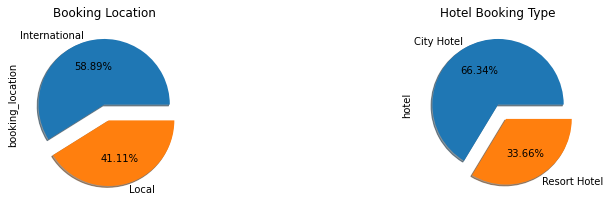

In [60]:
# wherer are all the the bookings comes from 

plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
df['booking_location'].value_counts().plot.pie(explode = [0, 0.25], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.title('Booking Location')

plt.subplot(1,3,3)
df['hotel'].value_counts().plot.pie(explode = [0, 0.25],
                                 autopct = '%1.2f%%',
                                 shadow = True)
plt.title('Hotel Booking Type')

plt.show()

# we see that more than half of the booking were from outside of the portugal while 41.11 % are from Portugal


#### Booking Market Segment & Distribution Channel

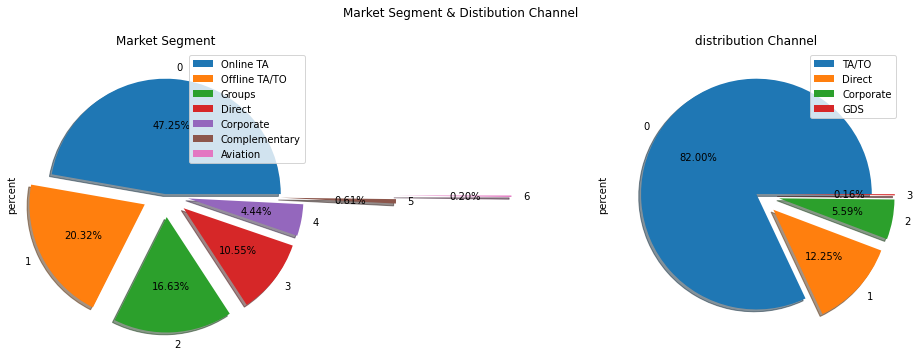

In [61]:
distribution_channel = df.stb.freq(['distribution_channel'], cum_cols = False)
market_segment = df.stb.freq(['market_segment'], cum_cols = False)
market_segment

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
market_segment['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2, 0.2, 1, 2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(market_segment['market_segment'])
plt.title('Market Segment')

plt.subplot(1,2,2)
distribution_channel['percent'].plot.pie(explode = [0, 0.2, 0.2, 0.2], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(distribution_channel['distribution_channel'])
plt.title('distribution Channel')

plt.suptitle('Market Segment & Distibution Channel')
plt.tight_layout()
plt.show()


#### Deposit Type

Text(0.5, 1.0, 'Deposit Type')

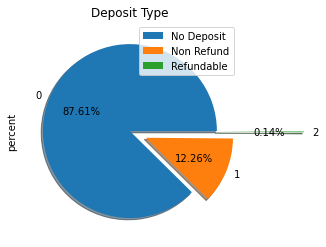

In [62]:
deposit_type = df.stb.freq(['deposit_type'],cum_cols = False)


deposit_type['percent'].plot.pie(explode = [0, 0.2, 1], 
                                               autopct = '%1.2f%%',
                                               shadow = True
                                               )
plt.legend(deposit_type['deposit_type'])
plt.title('Deposit Type')


#### Map of the Booking

In [63]:
country_data =  df.stb.freq(['country'], cum_cols = False)

guest_map = px.choropleth(country_data,
                    locations=country_data['country'],
                    color=country_data["percent"], 
                    hover_name=country_data['country'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Booking Map")
guest_map.show()

#### The Distribution of ADR

In [64]:
fig = px.histogram(df, x="adr",
                  title = 'ADR Distribution'
                  )
fig.show()

# from the histogram below we can see that the highest frequency of adr is where adr is around 61.5 - 62.49

#### Arrival Date Month 

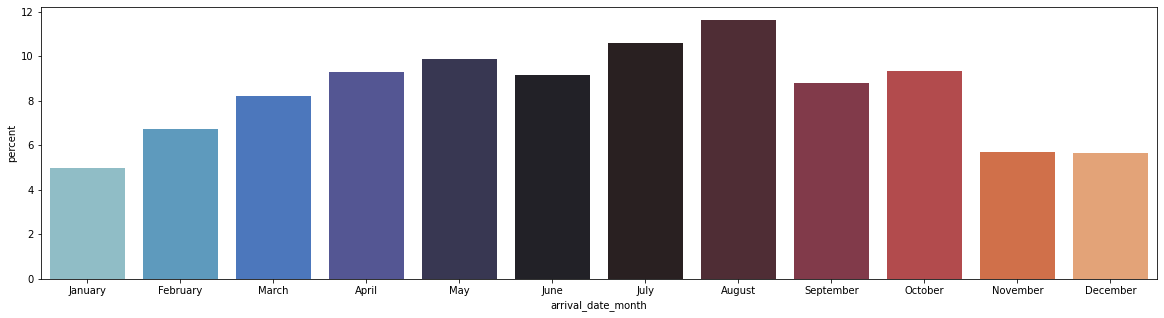

In [65]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

arrival = df.stb.freq(['arrival_date_month'], cum_cols = False)
# arrival['arrival_date_month'] = pd.Categorical(arrival['arrival_date_month'], categories=order, ordered=True)
arrival
plt.figure(figsize = (20, 5))
sns.barplot(x = 'arrival_date_month', y='percent', data = arrival, order = order, palette = 'icefire')
plt.show()
# we see from here that percentage of the arrival that august has the highest total booking 
# why is that :
# according to :
# https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.
# summer holiday in portugal will taken between 9 june to september 12 in 2021
# we are assuming the summer holiday in 2015 - 2017 happen around the same day 
# that might be the reason why booking for that arrival is higher  especially in august 

# however in this dataset we see that the month of august and july appear 3 times while the rest of the month appear
# for only 2 times this definitely have an effect on the number of percentage

#### Arrival  Month Year  & ADR

In [66]:
arrival_month_year = df.stb.freq(['month_year'],cum_cols = False).sort_values('month_year')
fig = px.bar(arrival_month_year, x = 'month_year', y = 'percent', text = 'percent')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

# we see from a booking pattern here that low season for hotel booking in portugal happened during winter time 
# (November, December, January) 
# percentage of booking happened during winter season are usually lower compared to booking in other months 
# we will see later of does this happened to both hotel or happened towards city / resort hotel 

# we also see a spike in percentage number of booking during the spring to summer (march, april, may)
# this might have somthing to do with portugal easter break ( end of march to early april)
# and the general summer break for the rest of the world 

#### Matplotlib / Seaborn Version

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2015-07'),
  Text(1, 0, '2015-08'),
  Text(2, 0, '2015-09'),
  Text(3, 0, '2015-10'),
  Text(4, 0, '2015-11'),
  Text(5, 0, '2015-12'),
  Text(6, 0, '2016-01'),
  Text(7, 0, '2016-02'),
  Text(8, 0, '2016-03'),
  Text(9, 0, '2016-04'),
  Text(10, 0, '2016-05'),
  Text(11, 0, '2016-06'),
  Text(12, 0, '2016-07'),
  Text(13, 0, '2016-08'),
  Text(14, 0, '2016-09'),
  Text(15, 0, '2016-10'),
  Text(16, 0, '2016-11'),
  Text(17, 0, '2016-12'),
  Text(18, 0, '2017-01'),
  Text(19, 0, '2017-02'),
  Text(20, 0, '2017-03'),
  Text(21, 0, '2017-04'),
  Text(22, 0, '2017-05'),
  Text(23, 0, '2017-06'),
  Text(24, 0, '2017-07'),
  Text(25, 0, '2017-08')])

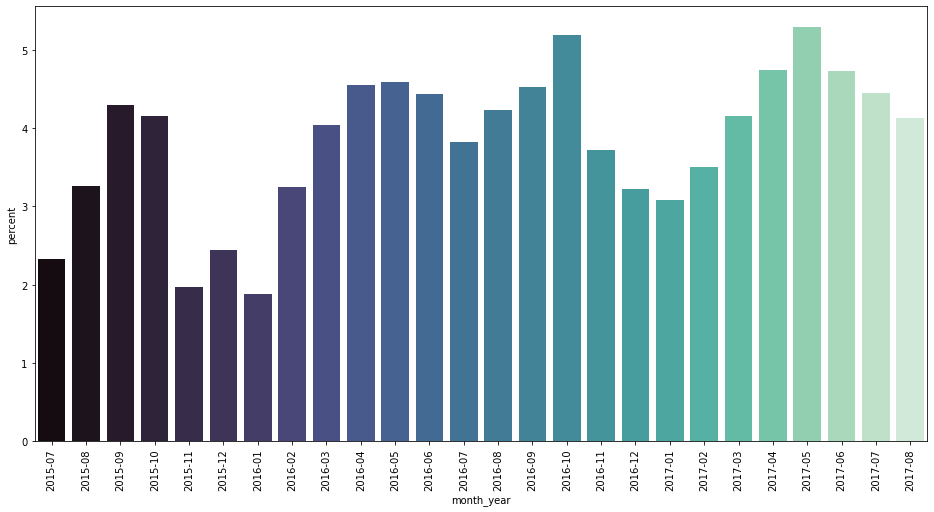

In [67]:
plt.figure(figsize = (16, 8))
sns.barplot(data = arrival_month_year, x = 'month_year', y = 'percent', palette = 'mako')
plt.xticks(rotation = 90)

In [68]:
month_year_adr =  pd.crosstab(df['month_year'], 'Median Price', values = df['adr'], aggfunc = 'median')

fig = px.line(month_year_adr, x = month_year_adr.index, y ='Median Price', title = 'Median ADR')
fig.show()

# the median adr in general follow the number of the booking as we can see during the low period (november, december, january)
# the median adr will goes down as well
# while during the month where the hotel is busy (summer)(may, june, july)
# the median adr will tend to goes up as well 


#### Arrival Month Year For Each Hotel & ADR

we want to compare how does number of booking difference in two hotels from month to month

In [69]:
hotel_month_year =  pd.crosstab(df['month_year'], df['hotel'], normalize = 'columns')

fig = go.Figure(data=[
    go.Bar(name='City Hotel', x=hotel_month_year.index, y=hotel_month_year['City Hotel']),
    go.Bar(name='Resort Hotel', x=hotel_month_year.index, y=hotel_month_year['Resort Hotel'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# we see a different trend for 2 different hotels 

# for resort hotels : 

# resort hotel in general out perfrom city hotel during winter period (November, December ,January)
# and why is so :
# our assumption is resort hotels generally offer more attraction compared to the city hotel
# while city hotel offered the possibility of exploring around hence it's located around the city 
# since the winter weather is not the nicest weather to go around, maybe that's why resort hotel is more preferable during
# the winter 

#2nd reason : 

# city hotel and resort hotel here are located in 2 different region 
# resort hotel located in algarve 
# while city hotel located in Lisbon 

# according to :
#https://www.algarveuncovered.com/out-of-season/, in algrave region the weather is somewhere (17 - 20) Celcius during the winter
# which still kind of warm 

# while in lisbon the weather tend to get cooler between 
#8 - 15 c in the winter this weather might be ther reason the booking during the winter for city hotel is way less 
# compared to the booking during the summer / warmer months 

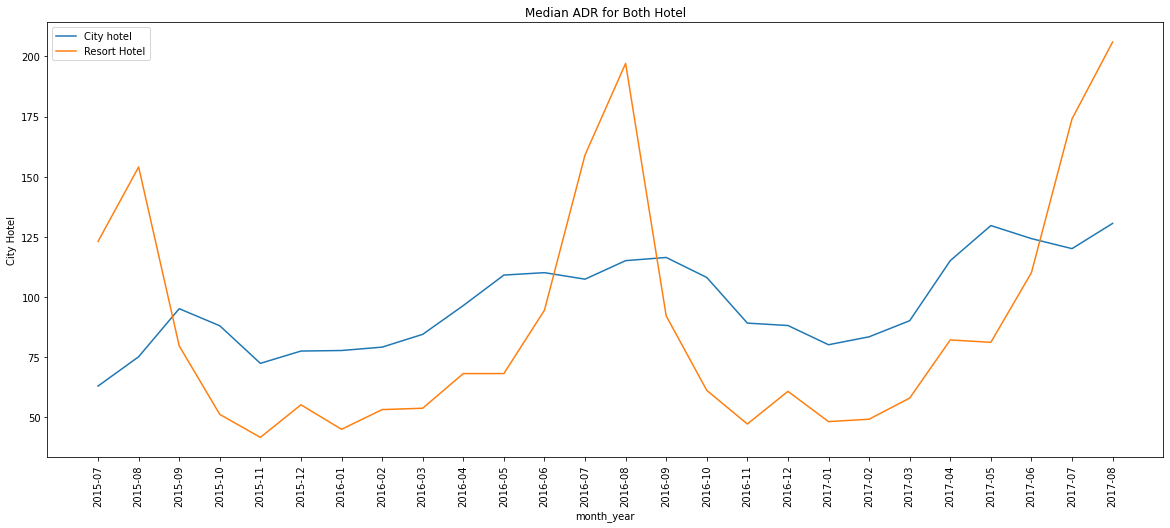

In [74]:
hotel_month_year_adr =  pd.crosstab(df['month_year'], df['hotel'], values = df['adr'], aggfunc = 'median')

plt.figure(figsize = (20, 8))

sns.lineplot(x = hotel_month_year_adr.index, y= hotel_month_year_adr['City Hotel'])
sns.lineplot(x = hotel_month_year_adr.index,y = hotel_month_year_adr['Resort Hotel'])
plt.xticks(rotation = 90)
plt.legend(['City hotel', 'Resort Hotel'])
plt.title('Median ADR for Both Hotel')
plt.show()

# from the graph we conclude that for resort hotel price is more fluctuative compared to the city hotel
# resort hotel price usually spike during the summer time May to June 
# while the price for resort hotel generally drop from August to november
# however there's a small increase during december (this might due to christmas)

# the median price for both hotel are getting more and more expensive per year


### Number of Cancellation Towards The Number of Booking 


based on many journal and article that number of cancellation rise as the number of booking increases, we want to how is this affecting portugal hotel bookings 

In [75]:
plt.figure(figsize = (20, 8))
sns.countplot(df['month_year'], hue = df['is_canceled'], palette = 'pastel')
plt.xticks(rotation = 90)

plt.show()

# as we can see from the chart below the number of cancellation generally goes up as the number of booking goes up
# however it doesn't seem number of cancellation has a linear effect towards number of booking 
# as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months 

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 1440x576 with 0 Axes>

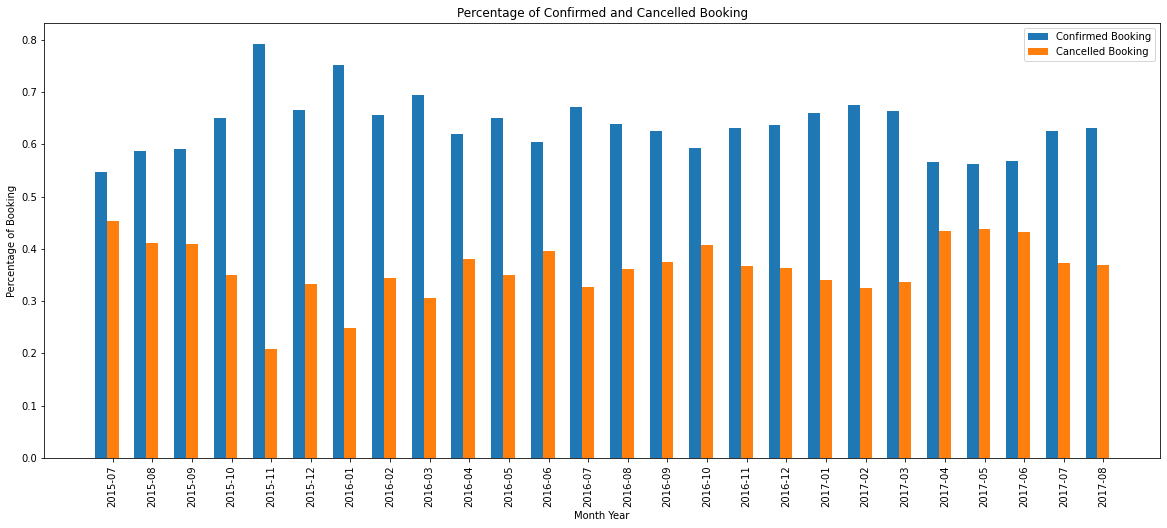

In [76]:
step = np.arange(0,26)
month_year_cancellation=pd.crosstab(df['month_year'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (20, 8))


ax.bar(step - 0.3, month_year_cancellation[0], width = 0.3)
ax.bar(step, month_year_cancellation[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(month_year_cancellation.index, Rotation = 90)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

# look at the table below and see the month of November 2015 and January 2016, majority of the month has a cancellation rate around
# 30 to 40 percent however these two months are the only months with cancellation rate below 30 % 
# and why is so ? 
# is it just because the randomness or is there any explanation behind it 
# hypothesis testing needed for this ??? 

#### ADR effect on the number of cancellation 


how does adr and number of cancellation affect each others 

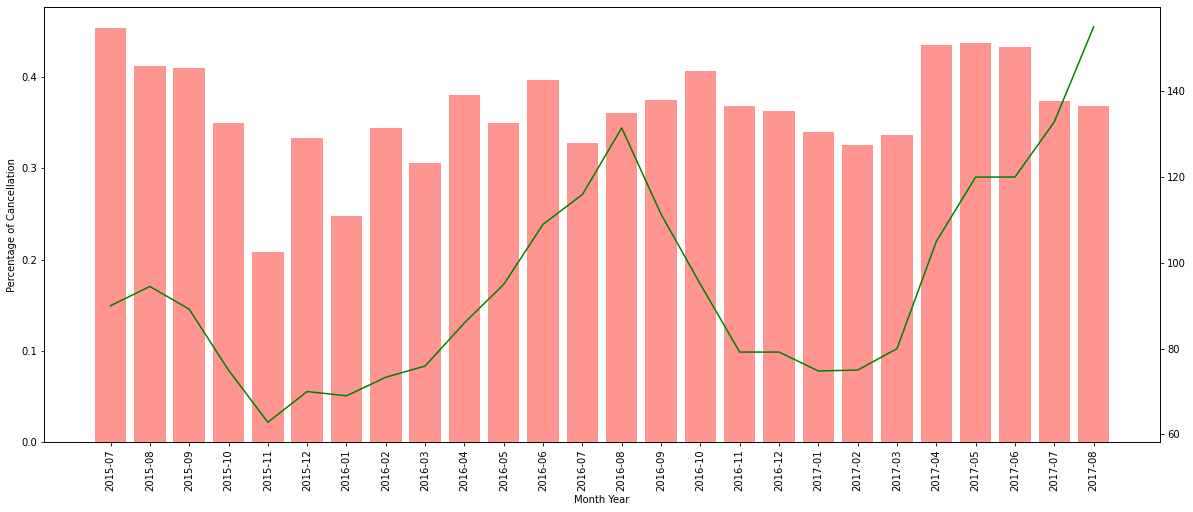

In [77]:
fig, ax1 = plt.subplots(figsize = (20, 8))
ax2 = ax1.twinx()

ax1.bar(step, month_year_cancellation[1], color = '#ff6961', alpha = 0.7)
ax1.set_xlabel('Month Year')
ax1.set_ylabel('Percentage of Cancellation')
ax2.plot(month_year_adr.index, month_year_adr['Median Price'], color = '#008000')
ax1.set_xticks(step)
ax1.set_xticklabels(month_year_cancellation.index, Rotation = 90)

plt.show()

# as we conclude that cancellation tend to goes up as the number of booking goes up 
# as the number of booking goes up the adr will goes up as well 
# so months with higher cancellation has higher adr compared to months with low cancellation 

#### Leadtime and cancellation

In [78]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,parking_space
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,11,Local,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0,24,Local,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0,0,International,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0,0,International,0,0,0


In [79]:
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Cancelled Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()


# we can see from the graph booking that has lead time more than 7 months are more likely to be canceled than to be confirmed
# in general the longer the lead time the higher the chances the booking to be cancelled compared to be confirmed 

In [80]:
pd.crosstab(df['lead_time_month'], df['is_canceled']).sort_index(ascending = True)[22:]

# we see that the 100 % of confirmed booking in month of 23 / 24 is only a sample of 1 single booking 


is_canceled,0,1
lead_time_month,,
24,1,0


#### Median Lead Time For Canceled and Confirmed Booking Each Month

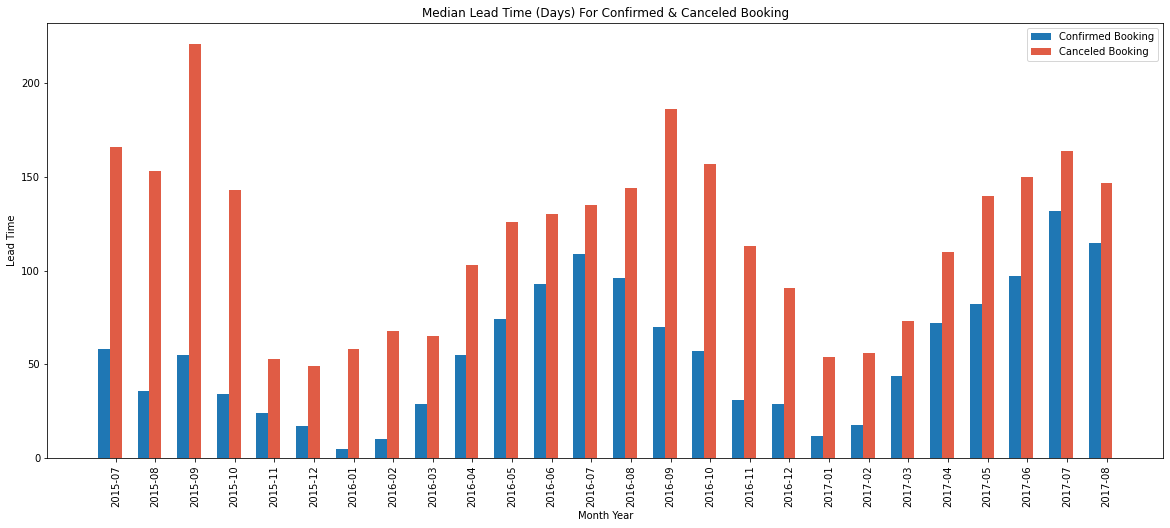

In [81]:
lead_time_booking =  pd.crosstab(df['month_year'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

step2 = np.arange(0,26)

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(step2 - 0.3, lead_time_booking[0], width = 0.3)
ax.bar(step2, lead_time_booking[1], width = 0.3, color = '#E05C45')
ax.set_xticks(step2)
ax.set_xticklabels(lead_time_booking.index, Rotation = 90)
plt.xlabel('Month Year')
plt.ylabel('Lead Time')
plt.title('Median Lead Time (Days) For Confirmed & Canceled Booking')
plt.legend(['Confirmed Booking', 'Canceled Booking'])
plt.show()

# we definitely see a pattern here for each month 


# December 2015 has the lowest median lead time for canceled and confirmed booking  
# for booking with arrival date in the spring & summer (march - august) in general have a longer median lead time compared to
# booking for fall - winter season (September - December)
# For each year September tend to have the highest median lead time for canceled booking 
# (we couldn't find any specific information why september in general has the highest lead time for canceled booking for the
# past 2 years)

# lead time for canceled booking and confirmed booking are somewhat positively correlated 
# means month that has a low lead time for confirmed booking usually has a low leadtime for canceled booking as well

# with month with high lead time of confirmed booking usually has a high lead time for their canceled booking

# in general canceled booking lead time always higher compared to confirmed booking for each month


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (23).

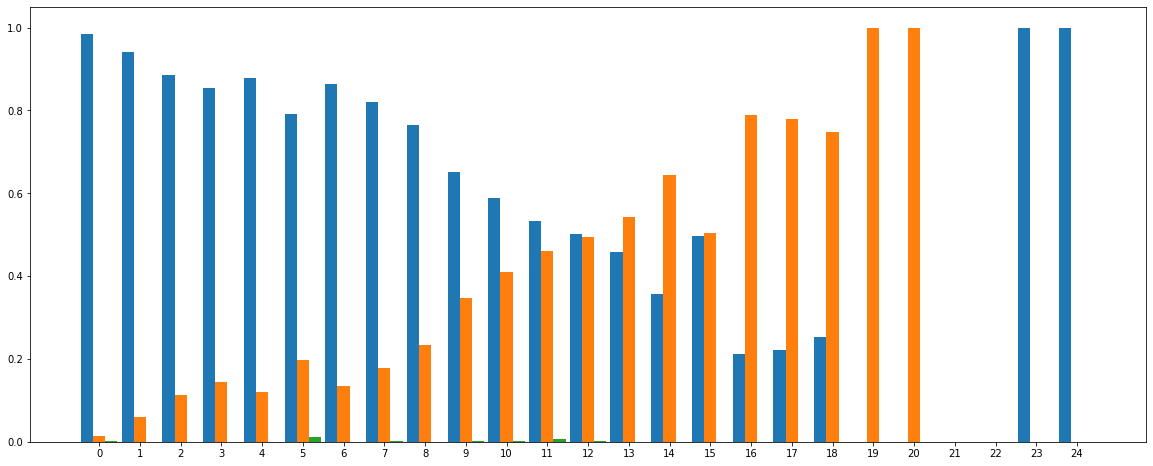

In [82]:

step2 = np.arange(0,25)

fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(lead_time_canceled.index - 0.3, lead_time_canceled_deposit['No Deposit'], width = 0.3)
ax.bar(lead_time_canceled.index, lead_time_canceled_deposit['Non Refund'], width = 0.3)
ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(step2)
ax.set_xticklabels(lead_time_canceled_deposit.index, Rotation = 90)
plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Deposit Type (%)')
plt.title('Percentage of Confirmed and Cancelled Booking')


# for longer advance reservations (13 months and above) there are generally more non refundable deposit type compared
# no deposit type this will protect hotel from cancellation from long advance reservation

# suggestion more non refund deposit policy should be implemented for longer booking period more than 7 months in advance
# since from our analysis booking that's more than 7 months in advances are more likely to be,cancelled
# hotel could implement (no refund rates for cheaper price)
# many hotels / TA used that technique to prevent from longer advance reservation cancellation

#### Booking Location & Cancellation 

we have separated the booking location into domestic booking (local) and international booking, how does each different booking location affecting cancellation

In [ ]:
booking_location =  pd.crosstab(df['booking_location'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=booking_location.index, y=booking_location[0]),
    go.Bar(name='Cancelled Booking', x=booking_location.index, y=booking_location[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for each booking location',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


# more than half of the booking that's made within portugal are cancelled
# booking that's made within portugal are almost 2.5 X more likely to be cancelled compared to booking that's made outside portugal

# local booking are more likely to be cancelled

#### Why Does Local Booking are way more likely to be canceled compared to the international booking

first we want to look at the deposit type and the effect of cancellation and how deposit type affect cancellation rate of both booking location 

In [ ]:
booking_location_cancelled =  pd.crosstab(df['booking_location'],df['is_previously_cancelled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Previously Not Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[0]),
    go.Bar(name='Previously  Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Previously Cancellation',
                 yaxis=dict(
                 title='Percentage of previous booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# our first analysis why local booking has higher cancellation rate compared to international booking is because 
# the higher previously cancelled booking rate in the local booking

# fromo our analysis that 92% of booking that's previously cancelled will be cancelled again 
# this might have an effect why local booking has higher cancellation rate compared to international booking
#

In [ ]:
booking_location_deposit = pd.crosstab(df['booking_location'],df['deposit_type'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=booking_location_deposit.index, y=booking_location_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=booking_location_deposit.index, y=booking_location_deposit['Non Refund']),
    go.Bar(name='Refundable', x=booking_location_deposit.index, y=booking_location_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit for each booking location',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# second reason is why local booking has more cancellation compared to international booking is because 
# there are more non refunable deposit booking for local booking compared to international booking
# from our past analysis we see that 99% of non refund booking were cancelled this might be the second reason why 
# local booking has more cancellation compared to international booking

# almost all international booking are made without deposit 99.2 %

In [ ]:
deposit_cancellation = pd.crosstab(df['deposit_type'],df['is_canceled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=deposit_cancellation.index, y=deposit_cancellation[0]),
    go.Bar(name='Canceled Booking', x=deposit_cancellation.index, y=deposit_cancellation[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation for each Deposit Type',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# we see that almost every non refund booking are most likely to be cancelled compared to other deposit ty[e]
# while the other 2 deposit type 

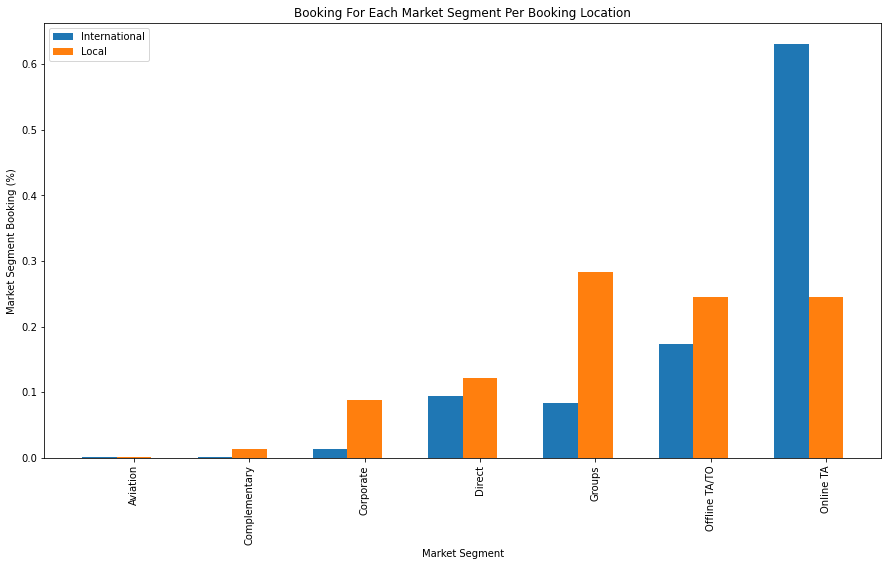

In [ ]:
location_segment =  pd.crosstab(df['market_segment'], df['booking_location'], normalize = 'columns')
location_segment_step = np.arange(0,7)
location_segment


fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(location_segment_step - 0.3, location_segment['International'], width = 0.3)
ax.bar(location_segment_step, location_segment['Local'], width = 0.3)
# ax.bar(lead_time_canceled.index + 0.3, lead_time_canceled_deposit['Refundable'], width = 0.3)

ax.set_xticks(location_segment_step)
ax.set_xticklabels(location_segment.index, Rotation = 90)
# plt.legend(['No Deposit', 'Non Refund', 'Refundable'])
plt.xlabel('Market Segment')
plt.ylabel ('Market Segment Booking (%)')
plt.legend(['International', 'Local'])
plt.title('Booking For Each Market Segment Per Booking Location')

plt.show()

# looking at the chart down below we see that for International Booking it is mainly Dominated By OTA (Online Travel Agent)
# for the local booking the booking market segment are kind of spread out 
# with the highest percentage belong to group booking 

# as we know from our past analysis Group Booking is the only market segment that has the higher cancelation rate compared
# to it's confirmed rate 61 % Cancelation Rate

# this is one of the reason my local booking have a higher cancellation rate compared to international booking 

#### Number of Adults , Guest & Cancellation

In [ ]:
adults_cancellation =  pd.crosstab(df['adults'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=adults_cancellation.index, y=adults_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=adults_cancellation.index, y=adults_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of Adults',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of Adults',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of Adults',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# we see that there are no confirmed booking for booking with more than 4 adults 
# suggestion : 
#hotel should limit the number of adults for each booking, since there are no confirmed booking with more than 4 adults
# hotel could resell (overbooking) the room that has 4 than 4 adults in the booking since hotel know they all will be cancelled

In [ ]:
guest_cancellation = pd.crosstab(df['guests'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=guest_cancellation.index, y=guest_cancellation[0], marker_color = 'forestgreen'),
    go.Bar(name='Cancelled Booking', x=guest_cancellation.index, y=guest_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Cancellation Per Number of guest',
                 yaxis=dict(
                 title='Cancellation Rate (%) / Each Numbers of guest',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Number of guest',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# for number of guest there's a slight difference with number of adults in term of cancellation 
# majority of booking with more than 5 guest in a single booking are likely to be cancelled
# however there are a few of confirmed booking with total guest of 10 and 12 
# booking with more than 12 of total guest are 100% cancelled

#### Market Segment & Cancellation

In [ ]:
market_cancellation = pd.crosstab(df['market_segment'], df['is_canceled'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=market_cancellation.index, y=market_cancellation[0]),
    go.Bar(name='Cancelled Booking', x=market_cancellation.index, y=market_cancellation[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Booking Per Market Segment',
                 yaxis=dict(
                 title='Percentage of booking (%) / Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# We can see pattern here for Aviation booking, Complementary, Corporate, and Direct cancellation rate range from 12 - 22 %
# while booking from travel agent market segment (online / offline) on average has 34 - 37 % cancellation
# the last is booking from group which has cancellation rate of 61 %, group booking has the highest cancellation among
# all market segment

# insight, direct booking has the lowest cancellation rate among all market segment, hotel should have program to encourage 
# people to book through direct booking (easy access of direct booking, multiple payment system, loyalty card, credit card bundle deals)


In [ ]:
### Deposit Type For each Market Segment

market_deposit = pd.crosstab(df['market_segment'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=market_deposit.index, y=market_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=market_deposit.index, y=market_deposit['Non Refund']),
    go.Bar(name='Refundable', x=market_deposit.index, y=market_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit Type for each Market Segment',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Market Segment',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


#### Repeated Guest & Cancellation

In [ ]:
repeated_cancelled = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=['Non Repeated Booking', 'Repeated Booking'], y=repeated_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking for Repeat & Non Repeat',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Types',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()


# customer who has a repeated booking (existing customers) are less likely to cancel their booking compared to new customers

# non repeated booking are more than twice more likely to be cancelled compared to repeated booking 

# suggestion: 
# hotels should focus more on re attract existing customers becase as we can see that repeated booking are less likely to be 
# cancelled compared to non repeated booking 

In [ ]:
## where does all repeated guest comes from 

repeated_distribution =  pd.crosstab(df['distribution_channel'], df['is_repeated_guest'], normalize = 'index')
repeated_distribution

fig = go.Figure(data=[
    go.Bar(name='Non Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[0]),
    go.Bar(name='Repeated Booking', x=repeated_distribution.index, y=repeated_distribution[1])])


fig.update_layout(barmode='group', title = 'Percentage of Cancellation per Distribution Channel',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Distribution Channel',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we can see  the majority of the booking from all the market segment are non repeated booking(new customers)
# however we see that corporate has the higest rate of repeated booking at (23. 5 %) that's almost a quarter means 
# almost 1 / 4 corporate booking is a repeated booking, 
# we can say that business traveler in this case is corporate booking are more likely to retain compared to leisure booking
# (we are assuming that other than corporate booking is leisure traveler)

#### Previously Cancellation & Cancellation 


how does the pattern of booking that's previosly cancelled towards the future booking compared to booking that's never been cancelled before 

In [ ]:
previously_cancelled =pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=previously_cancelled.index, y=previously_cancelled[0]),
    go.Bar(name='Cancelled Booking', x=previously_cancelled.index, y=previously_cancelled[1])])


fig.update_layout(barmode='group', title = 'Percentage of Previously Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Previously Cancelled',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we see from the data below we see that almost 92% of booking that has been cancelled will be cancelled again

# suggestion : all cancelled booking before should be on non refund deposit on the future booking because 
# we see that 92 % of past cancelled booking will cancel again by leveraging the policy we will be able to protect the hotel
# from losing revenue 

#### Parking Space & Cancellation 

first we want to look at the Required Car Parking Space and the effect of cancellation

In [ ]:
parking_cancel = pd.crosstab(df['parking_space'], df['is_canceled'], normalize = 'index')
parking_cancel

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=parking_cancel.index, y=parking_cancel[0]),
    go.Bar(name='Cancelled Booking', x=parking_cancel.index, y=parking_cancel[1])])


fig.update_layout(barmode='group', title = 'Parking Space And Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking / Cancelled Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Required Parking Space',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we see that booking who require a parking space never been cancelled based on the hotel booking database 
# there are around 6 % of booking that require a car parking space 


# the hotel could promote anything that makes people who vehicle life easier, eg(free valet, free charging for electric car, and etc)
# since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all 